<a href="https://colab.research.google.com/github/Desmyk/MACHINELEARNING/blob/main/Dataprep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [60]:
# mount Drive
from google.colab import drive
drive.mount('/content/drive')

# tdp -thermal design Power(Watt)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
# load dataset
data= "/content/drive/MyDrive/chip_dataset.csv"
df = pd.read_csv(data)
df

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor,FP16 GFLOPS,FP32 GFLOPS,FP64 GFLOPS
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD,NaN,NaN,NaN
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD,NaN,NaN,NaN
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD,NaN,NaN,NaN
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,NVIDIA GeForce RTX 3050 6 GB,GPU,NaN,8,80,200,8700,1042.0,Samsung,NVIDIA,6021.0,6021.0,94.08
4941,NVIDIA GeForce RTX 4070 SUPER,GPU,1/8/24,5,220,294,35800,1980.0,TSMC,NVIDIA,35480.0,35480.0,554.40
4942,NVIDIA GeForce RTX 4070 Ti SUPER,GPU,1/8/24,5,285,379,45900,2340.0,TSMC,NVIDIA,44100.0,44100.0,689.00
4943,NVIDIA GeForce RTX 4080 SUPER,GPU,1/8/24,5,320,379,45900,2295.0,TSMC,NVIDIA,52220.0,52220.0,816.00


In [62]:
# summary of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4945 entries, 0 to 4944
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Product                4945 non-null   object 
 1   Type                   4945 non-null   object 
 2   Release Date           4746 non-null   object 
 3   Process Size (nm)      4945 non-null   object 
 4   TDP (W)                4508 non-null   object 
 5   Die Size (mm^2)        4593 non-null   object 
 6   Transistors (million)  4390 non-null   object 
 7   Freq (GHz)             4508 non-null   float64
 8   Foundry                4330 non-null   object 
 9   Vendor                 4945 non-null   object 
 10  FP16 GFLOPS            800 non-null    float64
 11  FP32 GFLOPS            1685 non-null   float64
 12  FP64 GFLOPS            1278 non-null   float64
dtypes: float64(4), object(9)
memory usage: 502.4+ KB


In [63]:
# explore missing values

print(df.isnull().sum())

Product                     0
Type                        0
Release Date              199
Process Size (nm)           0
TDP (W)                   437
Die Size (mm^2)           352
Transistors (million)     555
Freq (GHz)                437
Foundry                   615
Vendor                      0
FP16 GFLOPS              4145
FP32 GFLOPS              3260
FP64 GFLOPS              3667
dtype: int64


In [64]:
# Drop non-consequential fields

# For release dates, I will drop the the rows with missing values.
df = df.dropna(subset=["Release Date"])

# drop the last 3 fields
df = df.drop(columns=['FP16 GFLOPS', 'FP32 GFLOPS', 'FP64 GFLOPS'])

df

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor
0,AMD Athlon 1000,CPU,6/5/00,180,54,120,37,1000.0,NaN,AMD
1,AMD Athlon 1000,CPU,10/31/00,180,54,120,37,1000.0,NaN,AMD
2,AMD Athlon 1100,CPU,8/14/00,180,60,120,37,1100.0,NaN,AMD
3,AMD Athlon 1133,CPU,10/31/00,180,63,120,37,1133.0,NaN,AMD
4,AMD Athlon 1200,CPU,10/31/00,180,66,120,37,1200.0,NaN,AMD
...,...,...,...,...,...,...,...,...,...,...
4937,AMD Radeon RX 7600 XT,GPU,1/8/24,6,190,204,13300,1720.0,TSMC,AMD
4941,NVIDIA GeForce RTX 4070 SUPER,GPU,1/8/24,5,220,294,35800,1980.0,TSMC,NVIDIA
4942,NVIDIA GeForce RTX 4070 Ti SUPER,GPU,1/8/24,5,285,379,45900,2340.0,TSMC,NVIDIA
4943,NVIDIA GeForce RTX 4080 SUPER,GPU,1/8/24,5,320,379,45900,2295.0,TSMC,NVIDIA


In [65]:
# Transform temporal data to correct format

df['Release Date'] = pd.to_datetime(df['Release Date'])
df

<ipython-input-65-d30aea66f53e>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Release Date'] = pd.to_datetime(df['Release Date'])


,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor
0,AMD Athlon 1000,CPU,2000-06-05,180,54,120,37,1000.0,NaN,AMD
1,AMD Athlon 1000,CPU,2000-10-31,180,54,120,37,1000.0,NaN,AMD
2,AMD Athlon 1100,CPU,2000-08-14,180,60,120,37,1100.0,NaN,AMD
3,AMD Athlon 1133,CPU,2000-10-31,180,63,120,37,1133.0,NaN,AMD
4,AMD Athlon 1200,CPU,2000-10-31,180,66,120,37,1200.0,NaN,AMD
...,...,...,...,...,...,...,...,...,...,...
4937,AMD Radeon RX 7600 XT,GPU,2024-01-08,6,190,204,13300,1720.0,TSMC,AMD
4941,NVIDIA GeForce RTX 4070 SUPER,GPU,2024-01-08,5,220,294,35800,1980.0,TSMC,NVIDIA
4942,NVIDIA GeForce RTX 4070 Ti SUPER,GPU,2024-01-08,5,285,379,45900,2340.0,TSMC,NVIDIA
4943,NVIDIA GeForce RTX 4080 SUPER,GPU,2024-01-08,5,320,379,45900,2295.0,TSMC,NVIDIA


In [66]:
# Impute missing values
# Convert the  columns to numeric, coercing errors to NaN
df['Process Size (nm)'] = pd.to_numeric(df['Process Size (nm)'], errors='coerce')
df['Process Size (nm)'].fillna(df['Process Size (nm)'].median(), inplace=True)
df['Die Size (mm^2)'] = pd.to_numeric(df['Die Size (mm^2)'], errors='coerce')
df['Die Size (mm^2)'].fillna(df['Die Size (mm^2)'].median(), inplace=True)
df['Transistors (million)'] = pd.to_numeric(df['Transistors (million)'], errors='coerce')
df['Transistors (million)'].fillna(df['Transistors (million)'].median(), inplace=True)
df['Freq (GHz)'].fillna(df['Freq (GHz)'].mean(), inplace=True)

df

,Product,Type,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Foundry,Vendor
0,AMD Athlon 1000,CPU,2000-06-05,180.0,54,120.0,37.0,1000.0,NaN,AMD
1,AMD Athlon 1000,CPU,2000-10-31,180.0,54,120.0,37.0,1000.0,NaN,AMD
2,AMD Athlon 1100,CPU,2000-08-14,180.0,60,120.0,37.0,1100.0,NaN,AMD
3,AMD Athlon 1133,CPU,2000-10-31,180.0,63,120.0,37.0,1133.0,NaN,AMD
4,AMD Athlon 1200,CPU,2000-10-31,180.0,66,120.0,37.0,1200.0,NaN,AMD
...,...,...,...,...,...,...,...,...,...,...
4937,AMD Radeon RX 7600 XT,GPU,2024-01-08,6.0,190,204.0,13300.0,1720.0,TSMC,AMD
4941,NVIDIA GeForce RTX 4070 SUPER,GPU,2024-01-08,5.0,220,294.0,35800.0,1980.0,TSMC,NVIDIA
4942,NVIDIA GeForce RTX 4070 Ti SUPER,GPU,2024-01-08,5.0,285,379.0,45900.0,2340.0,TSMC,NVIDIA
4943,NVIDIA GeForce RTX 4080 SUPER,GPU,2024-01-08,5.0,320,379.0,45900.0,2295.0,TSMC,NVIDIA


In [ ]:
# Task 5: Perform a full EDA

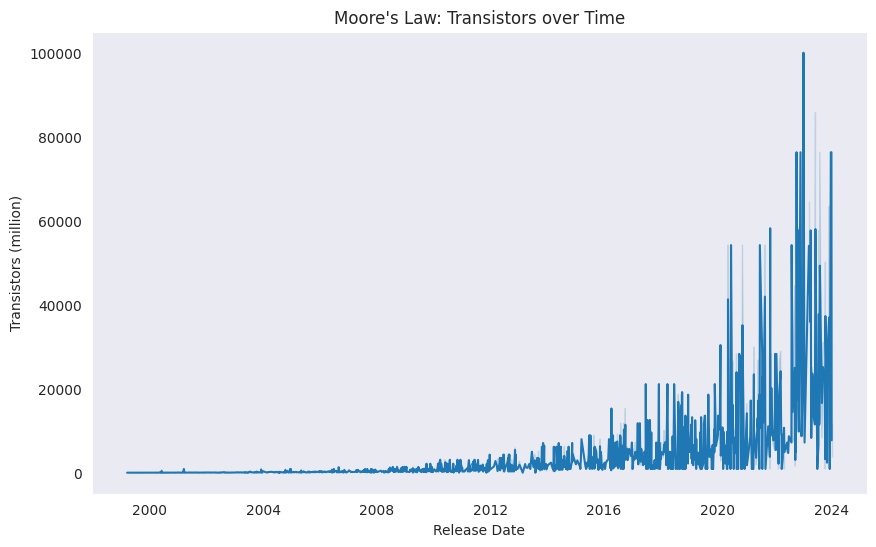

In [67]:
# ASSUMPTION
# 1 (Moore's Law)

# Moore's Law still holds, especially in GPUs
# transistor count over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Release Date', y='Transistors (million)', data=df)
plt.title("Moore's Law: Transistors over Time")
plt.show()

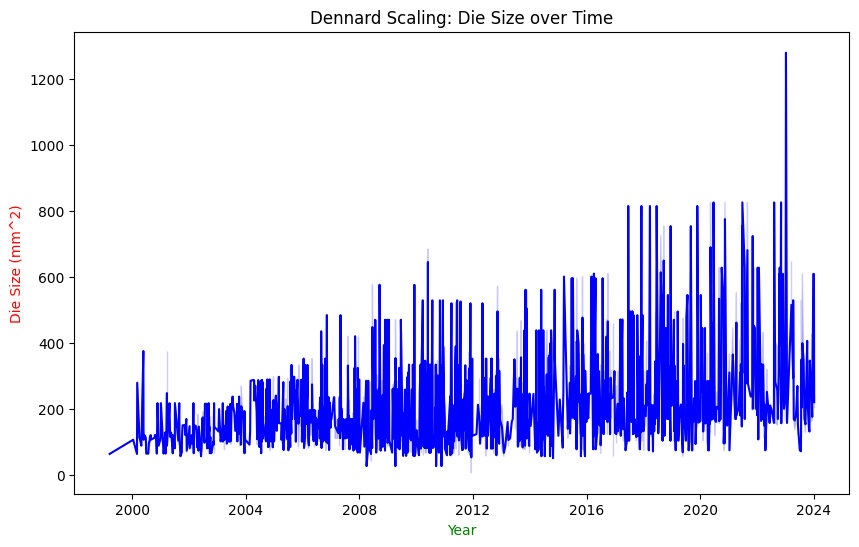

In [23]:
# Dennard Scaling is still valid in general.

plt.figure(figsize=(10, 6))
sns.lineplot(x='Release Date', y='Die Size (mm^2)', data=df, color='blue') # Set the line color to blue
plt.title("Dennard Scaling: Die Size over Time", color='black') # Set the title color to black
plt.xlabel('Year', color='green') # Set the x-axis label color to green
plt.ylabel('Die Size (mm^2)', color='red') # Set the y-axis label color to red
plt.show()

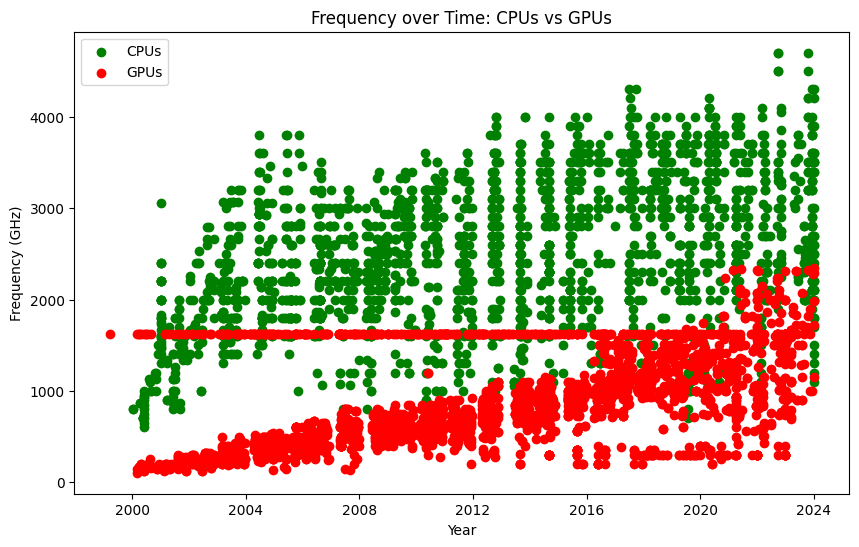

In [19]:
# Assumption 3: CPUs have higher frequencies, but GPUs are catching up.
# frequency over time for CPUs and GPUs

plt.figure(figsize=(10, 6))
plt.scatter(df[df['Type'] == 'CPU']['Release Date'], df[df['Type'] == 'CPU']['Freq (GHz)'], color='green', label='CPUs')
plt.scatter(df[df['Type'] == 'GPU']['Release Date'], df[df['Type'] == 'GPU']['Freq (GHz)'], color='red', label='GPUs')
plt.title("Frequency over Time: CPUs vs GPUs")
plt.xlabel("Year")
plt.ylabel("Frequency (GHz)")
plt.legend()
plt.show()

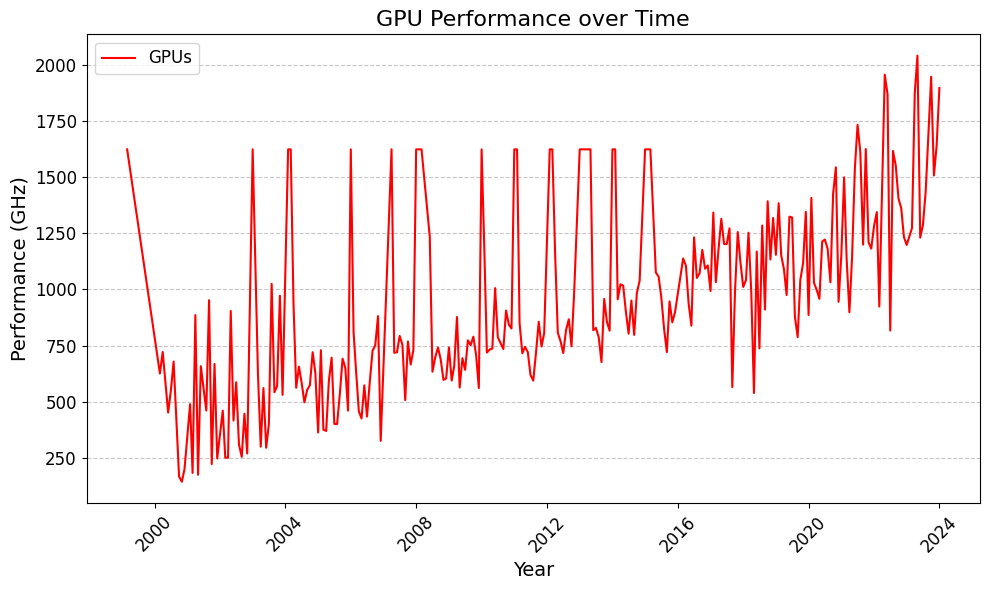

In [32]:
# Assumption 4: GPU performance doubles every 1.5 years.
# Plot GPU performance over time

# Group the data by 1.5 year intervals
# Instead of '1.5Y', use '18M' which represents 18 months, equivalent to 1.5 years.
df['Release Date Grouped'] = pd.to_datetime(df['Release Date']).dt.to_period('18M').dt.to_timestamp()

# Filter for GPUs and group by 1.5 year intervals
gpu_data = df[df['Type'] == 'GPU'].groupby('Release Date Grouped')['Freq (GHz)'].mean().reset_index()

plt.figure(figsize=(10, 6))
# Use the 'Release Date Grouped' column for x-axis and 'Freq (GHz)' for y-axis
# Use a line chart instead of a scatterplot
plt.plot(gpu_data['Release Date Grouped'], gpu_data['Freq (GHz)'], color='red', label='GPUs')
plt.title("GPU Performance over Time", fontsize=16) # Increase title font size
plt.xlabel("Year", fontsize=14) # Increase x-axis label font size
plt.ylabel("Performance (GHz)", fontsize=14) # Increase y-axis label font size
plt.xticks(rotation=45, fontsize=12) # Rotate x-axis labels for better readability and increase font size
plt.yticks(fontsize=12) # Increase y-axis tick label font size
plt.legend(fontsize=12) # Increase legend font size
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a grid to the y-axis
plt.tight_layout() # Adjust layout to prevent overlapping
plt.show()

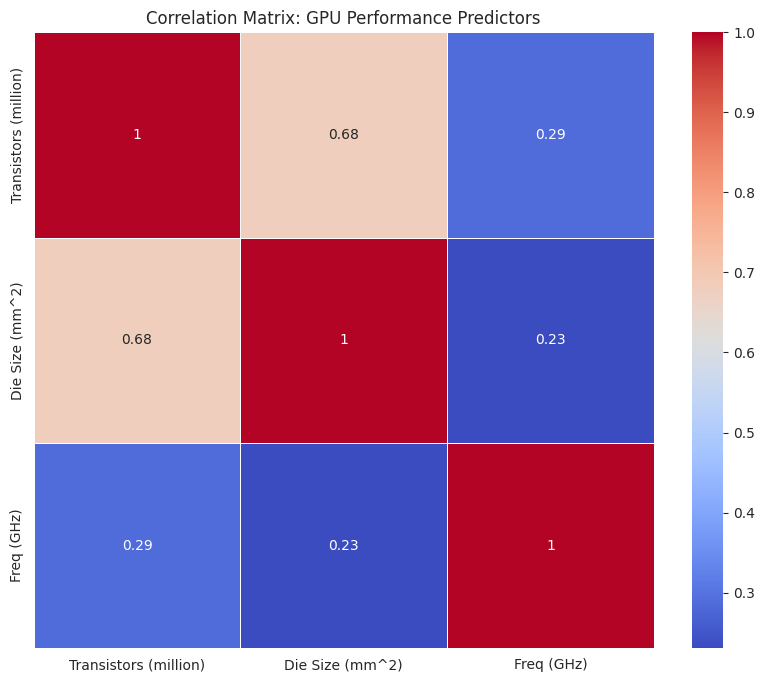

In [68]:
# Assumption 5: GPU performance improvement is a joint effect of smaller transistors, larger die size, and higher frequency.
# Plot correlation matrix for GPU performance and its predictors

gpu_corr = df[df['Type'] == 'GPU'][['Transistors (million)', 'Die Size (mm^2)', 'Freq (GHz)']].corr()

# Create a heatmap using seaborn to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(gpu_corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Matrix: GPU Performance Predictors")
plt.show()

<ipython-input-36-5d1c684143c4>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(high_end_gpus['Process Size (nm)'], label='High-end GPUs', shade=True)
<ipython-input-36-5d1c684143c4>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(low_end_gpus['Process Size (nm)'], label='Low-end GPUs', shade=True)


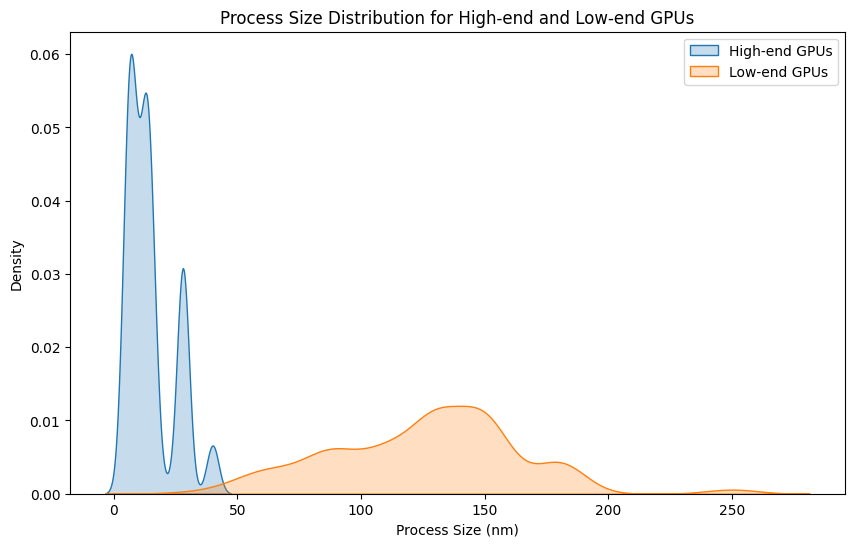

In [36]:
# Assumption 6: High-end GPUs tend to first use new semiconductor technologies. Low-end GPUs may use old technologies for a few years.
high_end_gpus = df[(df['Type'] == 'GPU') & (df['Transistors (million)'] > df['Transistors (million)'].quantile(0.75))]
low_end_gpus = df[(df['Type'] == 'GPU') & (df['Transistors (million)'] < df['Transistors (million)'].quantile(0.25))]
plt.figure(figsize=(10, 6))
sns.kdeplot(high_end_gpus['Process Size (nm)'], label='High-end GPUs', shade=True)
sns.kdeplot(low_end_gpus['Process Size (nm)'], label='Low-end GPUs', shade=True)
plt.title("Process Size Distribution for High-end and Low-end GPUs")
plt.legend()
plt.show()

<ipython-input-43-b71b70ccfdff>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Vendor', y='Process Size (nm)', data=df,


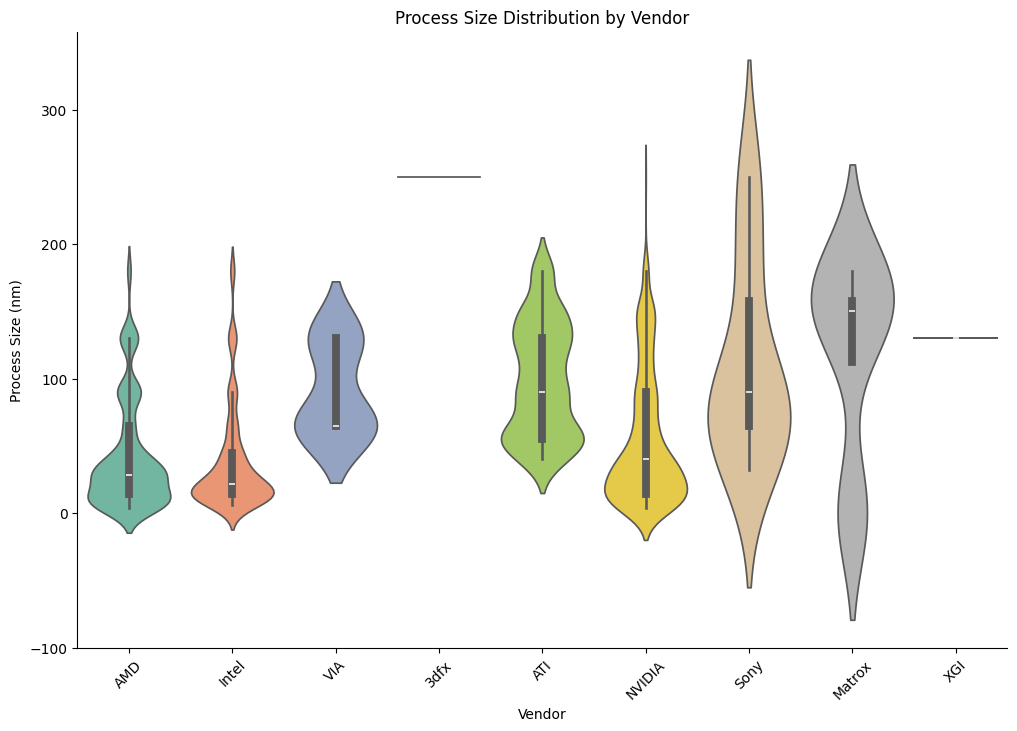

In [43]:
# Assumption 7: Process Size for Intel, AMD, and Nvidia lies in a comparatively lower range than for ATI and other vendors.
# Plot process size distribution for different vendors
plt.figure(figsize=(12, 8))
sns.violinplot(x='Vendor', y='Process Size (nm)', data=df,
               palette="Set2",  # Colorful palette


)
plt.title("Process Size Distribution by Vendor")
plt.xlabel("Vendor")
plt.ylabel("Process Size (nm)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
sns.despine()  # Remove top and right spines
plt.show()

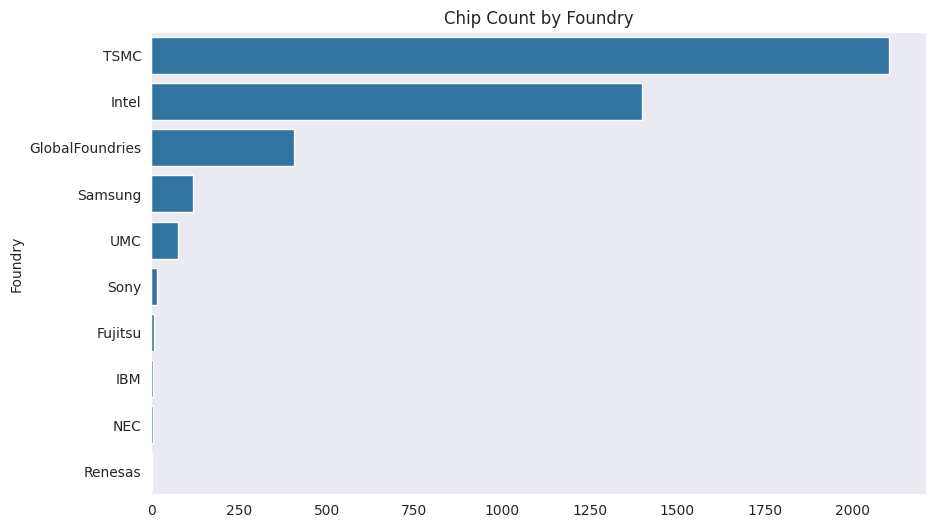

In [47]:
# Assumption 8: TSMC makes the highest number of chips in the world.
# Plot chip count by manufacturer

# Count the occurrences of each foundry in the dataset
chip_count = df['Foundry'].value_counts()

# Sort the foundry counts in descending order
chip_count = chip_count.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
# Create a horizontal barplot using seaborn
sns.set_style("dark")
sns.barplot(x=chip_count.values, y=chip_count.index, orient='h')
plt.title("Chip Count by Foundry")
plt.show()

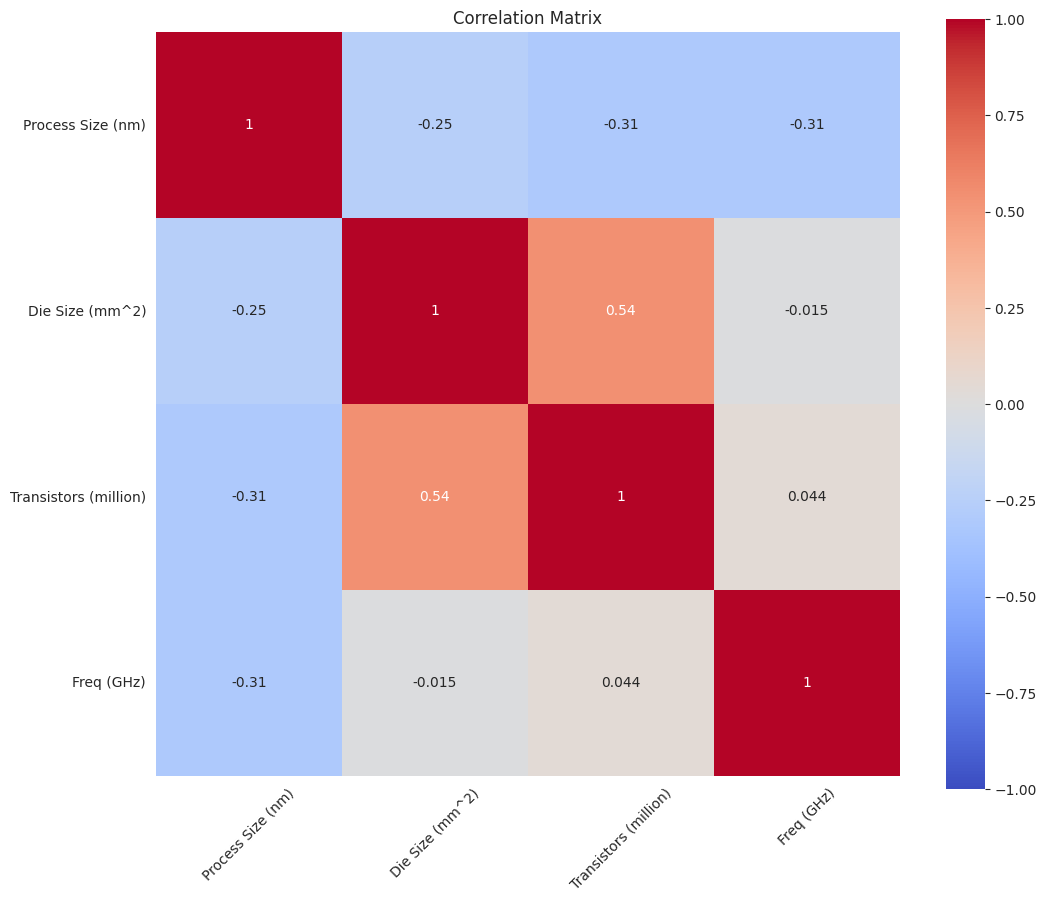

In [57]:
# Calculate the correlation matrix
plt.figure(figsize=(12, 10))
# Select only numerical columns for correlation calculation
corr_matrix = df.select_dtypes(include=['number']).corr()
# Store the return value of sns.heatmap() in a variable
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title("Correlation Matrix")
plt.show()

In [69]:
# Perform appropriate encoding for modeling
df = pd.get_dummies(df, columns=['Type', 'Vendor', 'Foundry'])
df

,Product,Release Date,Process Size (nm),TDP (W),Die Size (mm^2),Transistors (million),Freq (GHz),Type_CPU,Type_GPU,Vendor_3dfx,...,Foundry_Fujitsu,Foundry_GlobalFoundries,Foundry_IBM,Foundry_Intel,Foundry_NEC,Foundry_Renesas,Foundry_Samsung,Foundry_Sony,Foundry_TSMC,Foundry_UMC
0,AMD Athlon 1000,2000-06-05,180.0,54,120.0,37.0,1000.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,AMD Athlon 1000,2000-10-31,180.0,54,120.0,37.0,1000.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,AMD Athlon 1100,2000-08-14,180.0,60,120.0,37.0,1100.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,AMD Athlon 1133,2000-10-31,180.0,63,120.0,37.0,1133.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,AMD Athlon 1200,2000-10-31,180.0,66,120.0,37.0,1200.0,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4937,AMD Radeon RX 7600 XT,2024-01-08,6.0,190,204.0,13300.0,1720.0,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4941,NVIDIA GeForce RTX 4070 SUPER,2024-01-08,5.0,220,294.0,35800.0,1980.0,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4942,NVIDIA GeForce RTX 4070 Ti SUPER,2024-01-08,5.0,285,379.0,45900.0,2340.0,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4943,NVIDIA GeForce RTX 4080 SUPER,2024-01-08,5.0,320,379.0,45900.0,2295.0,False,True,False,...,False,False,False,False,False,False,False,False,True,False
